In [1]:
import os
import pickle
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from P02_MSIE.T08_exp.vrptw_v10 import VRPTW

CURRENT_DIR = os.getcwd()
print(f"Current Directory: {CURRENT_DIR}")
datetime_now = datetime.now().strftime("%Y%m%d_%H%M%S")
os.makedirs(f"{CURRENT_DIR}/_tmp", exist_ok=True)


Current Directory: c:\Users\admin\Coding\research\rl-meta-test\src\P02_MSIE\T08_exp


In [2]:
folder = "R_20251113_185747"
it = 181249

In [3]:
with open(f"./save_models/{folder}/exp_{it:05d}.pkl", "rb") as f:
    exp = pickle.load(f)
exp.tail()

,action,reward,done,F,CR,MG,best_solution,convergence_rate,std_pop,total_iteration,best_trial_fitness,std_trial_fitness,patience_ratio,idx_iteration,patience_remaining,TimeLimit.truncated
260,"[0.486398021517694, 0.07676269978672266, 0.481...",1.213932e-06,False,0.486398,0.076763,0.481702,0.458631,1.0,0.433472,2.61,0.627611,0.361903,0.125,2609,50,False
261,"[0.48181533442914487, 0.05901300150156022, 0.4...",7.362871e-07,False,0.481815,0.059013,0.458304,0.458631,1.0,0.434923,2.62,0.534631,0.402114,0.100,2619,40,False
262,"[0.46205483395606284, 0.12271724254459143, 0.4...",4.465807e-07,False,0.462055,0.122717,0.454030,0.458631,1.0,0.418813,2.63,0.747538,0.365206,0.075,2629,30,False
263,"[0.554663581597805, 0.0866286003485322, 0.4538...",2.708649e-07,False,0.554664,0.086629,0.453870,0.458631,1.0,0.412530,2.64,0.924012,0.220001,0.050,2639,20,False
264,"[0.553450639206171, 0.2989903456616402, 0.4419...",1.642879e-07,False,0.553451,0.298990,0.441997,0.458631,1.0,0.434644,2.65,0.867077,0.298596,0.025,2649,10,False


In [4]:
with open(f"./save_models/{folder}/vrp_{it:05d}.pkl", "rb") as f:
    info = pickle.load(f)

global_solution_history = info["global_solution_history"]
population = info["population"]
fitness_trial_history = info["fitness_trial_history"]
vrptw = info["vrptw"]
episode_reward = info["episode_reward"]
episode_length = info["episode_length"]
best_solution = info["best_solution"]
print(f"Episode Reward: {episode_reward}, Episode Length: {episode_length}, Best Solution: {best_solution}")

Episode Reward: 749.888548, Episode Length: 266, Best Solution: 0.45863132509293075


Best global solution: 0.45863132509293075


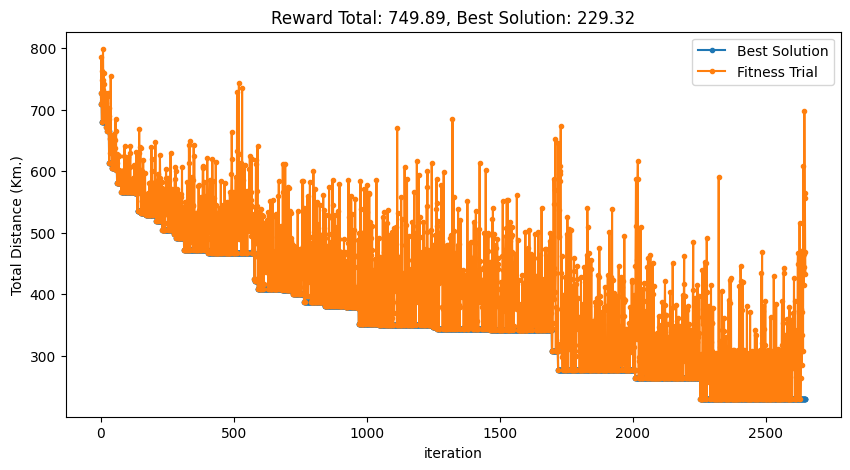

In [5]:
print(f"Best global solution: {min(global_solution_history)}")
# Plot results
fig, ax = plt.subplots(1, figsize=(10, 5))
x = np.arange(len(global_solution_history))
y1 = np.array(global_solution_history) * vrptw.solution_scale_factor
y2 = np.array(fitness_trial_history) * vrptw.solution_scale_factor
ax.plot(x, y1, marker=".", label="Best Solution")
ax.plot(x, y2, marker=".", label="Fitness Trial")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title=f"Reward Total: {episode_reward:.2f}, Best Solution: {best_solution*vrptw.solution_scale_factor:.2f}",
)
ax.legend()
fig.savefig(f"{CURRENT_DIR}/_tmp/plot_{datetime_now}_{it:05d}.png",
    dpi=300,
)


In [6]:
current_cost = [vrptw.objective_func(p) for p in population]
idx_min = np.argmin(current_cost)
print(current_cost[idx_min])

229.31566254646538


[0.20675548 0.17456217 0.         0.09781626 0.65784093 0.08610247
 0.72961902 0.75320353 0.03741688 0.79621828 0.90443376 0.6034775
 0.42263222 0.59928122 0.56673965 0.59896235 0.4534487  0.45936253
 0.50829765 0.23761849 0.42168236 0.41285938 0.40962773 0.31123006
 0.40684439 0.65909493 0.53014659 0.52926494 0.29547722 0.48735779
 0.74934259 0.44926743 0.89537193 0.45963569 0.50309988 0.4864881
 0.42620031 0.32228107 0.82765092 0.76760224 0.28825796 0.96998375
 0.50165516 0.27100984 0.30771124 0.59500789 0.66320296 0.78035669
 0.13536933 0.30304032]


<Axes: >

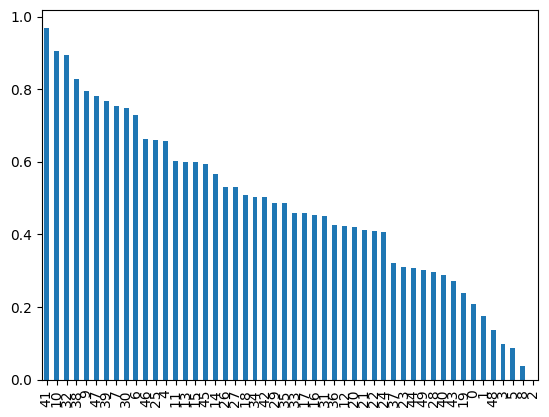

In [7]:
# How to visualize population
best_individual = population[idx_min]
print(best_individual)
pd.Series(best_individual).sort_values(ascending=False).plot.bar()

In [8]:
vrptw.objective_func(population[idx_min])

229.31566254646538

In [9]:
exp.columns

Index(['action', 'reward', 'done', 'F', 'CR', 'MG', 'best_solution',
       'convergence_rate', 'std_pop', 'total_iteration', 'best_trial_fitness',
       'std_trial_fitness', 'patience_ratio', 'idx_iteration',
       'patience_remaining', 'TimeLimit.truncated'],
      dtype='object')

<Axes: >

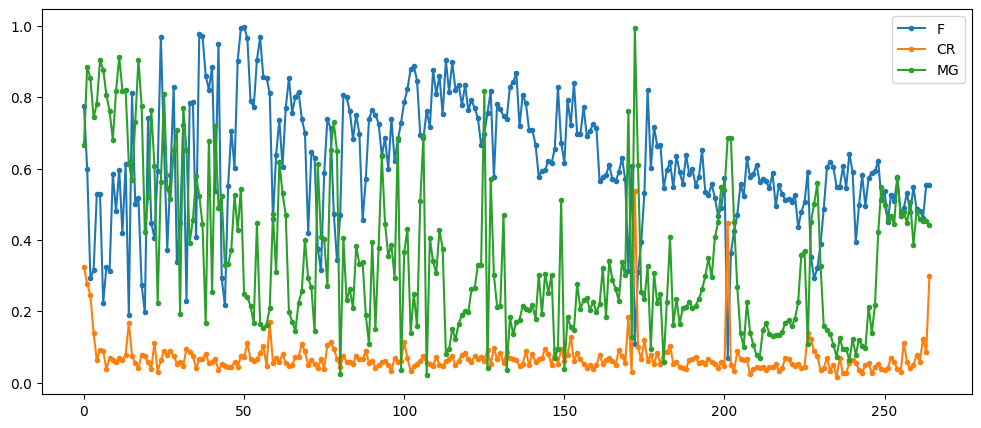

In [10]:
exp[["F", "CR", "MG"]].plot(figsize=(12,5), marker=".")